<a href="https://colab.research.google.com/github/ufairahbashir/googlecolab/blob/main/T2_PCD_H071201091_Ufairah.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## nama : ufairah damara bashir
### NIM : H071201091

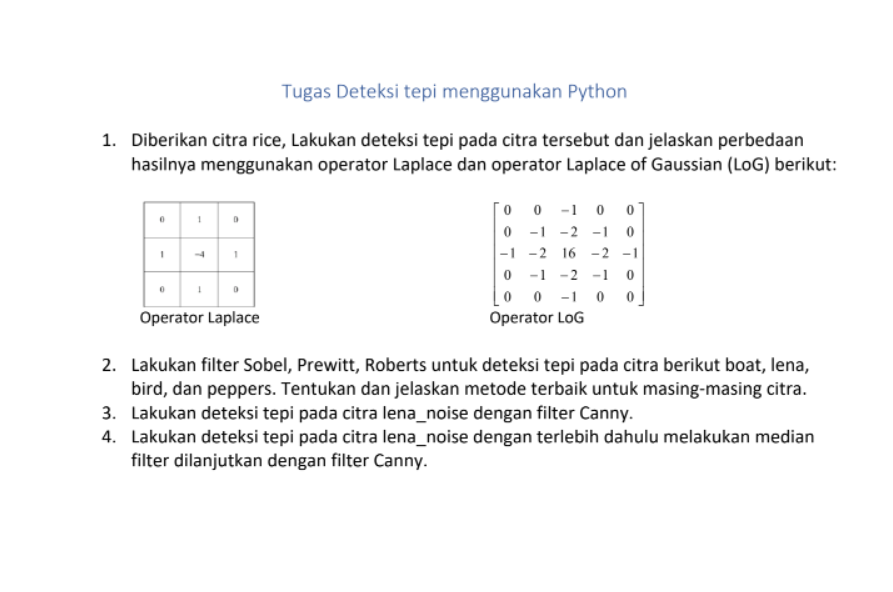

## Import Library

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
from numpy import *
from matplotlib import pyplot as plt
import matplotlib.image as mpimg
import cv2
from matplotlib import pyplot as plt
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import ImageDataGenerator
from skimage import io
from tensorflow.keras.applications.resnet_v2 import preprocess_input as preprocess_resnetv2
import numpy as np
import os
from PIL import Image
from scipy import ndimage

1. Diberikan citra rice, Lakukan deteksi tepi pada citra tersebut dan jelaskan perbedaan
hasilnya menggunakan operator Laplace dan operator Laplace of Gaussian (LoG) berikut:

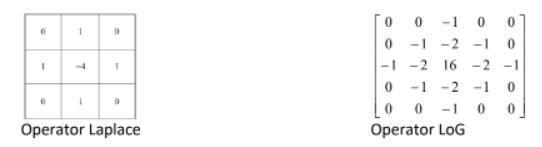

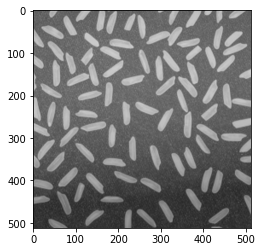

In [ ]:
rice = cv2.imread('/content/drive/MyDrive/WORK/PERKULIAHAN/semester4/PDC/tugas2/rice.png')
plt.imshow(rice)

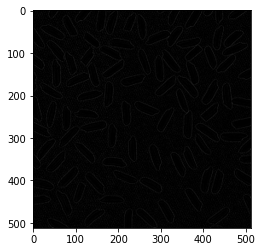

In [ ]:
ar = np.array(rice)
P = np.array([[0, 1, 0], [1, -4, 1], [0, 1, 0]])
output2 = cv2.filter2D(ar, -1, P)
plt.imshow(output2)

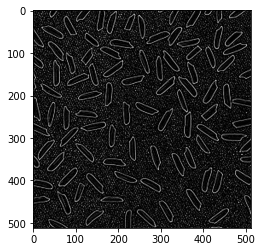

In [ ]:
ar = np.array(rice)
kernel_log = np.array(
[[ 0, 0, -1, 0, 0],
 [0, -1, -2, -1, 0],
 [-1, -2, 16, -2, -1],
 [0, -1, -2, -1, 0],
 [ 0, 0, -1, 0, 0]])
output3 = cv2.filter2D(rice, -1, kernel_log)
plt.imshow(output3, cmap="gray")

kesimpulan:
<br>
pada gambar pertama atau citra dari metode operator laplace:
<br>a. citra yang muncul masih samar
<br>b. kecerahan minimun sehingga tidak tampak outline dari beras
<br>c. tidak kontras antara hitam atau putih jadi citra tampak sekilas seperti gambar hitam saja
<br>
<br>Citra metode operator laplace of gaussian:
<br>a. citra yang ditampilkan lebih kontras sehingga dapat dilihat butiran beras dan titik-titik di background beras
<br>b. terlihat dengan jelas garis dan objek dari citra tersebut.

2. Lakukan filter Sobel, Prewitt, Roberts untuk deteksi tepi pada citra berikut boat, lena,bird, dan peppers. Tentukan dan jelaskan metode terbaik untuk masing-masing citra.

In [ ]:
boat = cv2.imread('/content/drive/MyDrive/WORK/PERKULIAHAN/semester4/PDC/tugas2/boat.tiff')
lena = cv2.imread('/content/drive/MyDrive/WORK/PERKULIAHAN/semester4/PDC/tugas2/lena.bmp')
bird = cv2.imread('/content/drive/MyDrive/WORK/PERKULIAHAN/semester4/PDC/tugas2/bird.bmp')
pepper = cv2.imread('/content/drive/MyDrive/WORK/PERKULIAHAN/semester4/PDC/tugas2/pepper.tiff')

Text(0.5, 1.0, 'pepper')

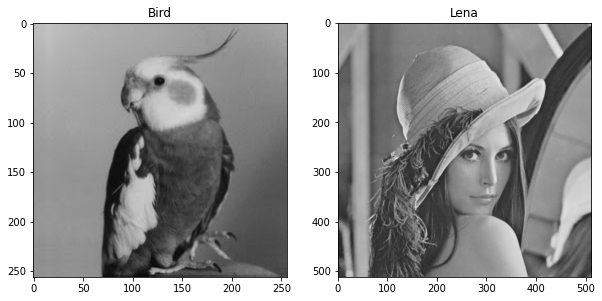

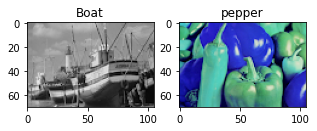

In [ ]:
f, ax = plt.subplots(1,2, figsize=(10,10))
ax[0].imshow(bird)
ax[0].set_title("Bird")

ax[1].imshow(lena)
ax[1].set_title("Lena")

f, ax = plt.subplots(1,2, figsize=(5,5))
ax[0].imshow(boat)
ax[0].set_title("Boat")

ax[1].imshow(pepper)
ax[1].set_title("pepper")

In [ ]:
#mengubah pepper ke hitam putih
image_grayscale_temp = cv2.cvtColor(pepper, cv2.COLOR_BGR2GRAY)
bwpepper = cv2.cvtColor(image_grayscale_temp, cv2. COLOR_GRAY2RGB)

Text(0.5, 1.0, 'bwpepper')

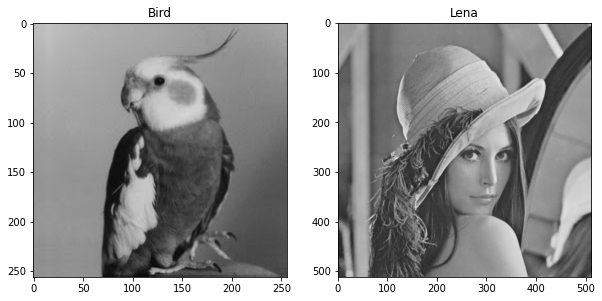

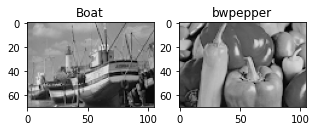

In [ ]:
f, ax = plt.subplots(1,2, figsize=(10,10))
ax[0].imshow(bird)
ax[0].set_title("Bird")

ax[1].imshow(lena)
ax[1].set_title("Lena")

f, ax = plt.subplots(1,2, figsize=(5,5))
ax[0].imshow(boat)
ax[0].set_title("Boat")

ax[1].imshow(bwpepper)
ax[1].set_title("bwpepper")

a. sobel

In [ ]:

# Sobel Edge Detection
sobelx = cv2.Sobel(src=bird, ddepth=cv2.CV_64F, dx=1, dy=0, ksize=5)
sobelx1 = cv2.Sobel(src=lena, ddepth=cv2.CV_64F, dx=1, dy=0, ksize=5)
sobelx2= cv2.Sobel(src=boat, ddepth=cv2.CV_64F, dx=1, dy=0, ksize=5)
sobelx3 = cv2.Sobel(src=bwpepper, ddepth=cv2.CV_64F, dx=1, dy=0, ksize=5)
# Sobel Edge Detection di X axis
sobely = cv2.Sobel(src=bird, ddepth=cv2.CV_64F, dx=0, dy=1, ksize=5)
sobely1 = cv2.Sobel(src=lena, ddepth=cv2.CV_64F, dx=0, dy=1, ksize=5)
sobely2 = cv2.Sobel(src=boat, ddepth=cv2.CV_64F, dx=0, dy=1, ksize=5)
sobely3 = cv2.Sobel(src=bwpepper, ddepth=cv2.CV_64F, dx=0, dy=1, ksize=5)
# Sobel Edge Detection diY axis
sobelxy = cv2.Sobel(src=bird, ddepth=cv2.CV_64F, dx=1, dy=1, ksize=5)
sobelxy1 = cv2.Sobel(src=lena, ddepth=cv2.CV_64F, dx=1, dy=1, ksize=5)
sobelxy2 = cv2.Sobel(src=boat, ddepth=cv2.CV_64F, dx=1, dy=1, ksize=5)
sobelxy3 = cv2.Sobel(src=bwpepper, ddepth=cv2.CV_64F, dx=1, dy=1, ksize=5)

# Combined X dan Y Sobel Edge Detection
sbird = sobelx + sobely
slena = sobelx1 + sobely1
sboat = sobelx2 + sobely2
sbwpepper = sobelx3 + sobely3

# Canny Edge Detection
sbird = cv2.Canny(image=bird, threshold1=100, threshold2=200)
slena = cv2.Canny(image=lena, threshold1=100, threshold2=200)
sboat = cv2.Canny(image=boat, threshold1=100, threshold2=200)
sbwpepper = cv2.Canny(image=bwpepper, threshold1=100, threshold2=200)

b. prewit

In [ ]:
#Prewit
kx = np.array([[1,1,1],[0,0,0],[-1,-1,-1]])
ky = np.array([[-1,0,1],[-1,0,1],[-1,0,1]])

#bird
imgx = cv2.filter2D(bird, -1, kx)
imgy = cv2.filter2D(bird, -1, ky)
pbird = imgx + imgy

#lena
imgx1 = cv2.filter2D(lena, -1, kx)
imgy1 = cv2.filter2D(lena, -1, ky)
plena = imgx1 + imgy1

#boat
imgx2 = cv2.filter2D(boat, -1, kx)
imgy2 = cv2.filter2D(boat, -1, ky)
pboat = imgx2 + imgy2

#prewit black and white pepper
imgx3 = cv2.filter2D(bwpepper, -1, kx)
imgy3 = cv2.filter2D(bwpepper, -1, ky)
pbwpepper = imgx3 + imgx3

c. robert

In [ ]:
#robert
rx = np.array( [[1, 0 ],
                [0,-1 ]] )

ry = np.array( [[ 0, 1 ],
               [ -1, 0 ]] )

#bird
imgrx = cv2.filter2D(bird, -1, rx)
imgry = cv2.filter2D(bird, -1, ry)
rbird = imgrx + imgry

#lena
imgrx1 = cv2.filter2D(lena, -1, rx)
imgry1 = cv2.filter2D(lena, -1, ry)
rlena = imgrx1 + imgry1

#boat
imgrx2 = cv2.filter2D(boat, -1, rx)
imgry2 = cv2.filter2D(boat, -1, ry)
rboat = imgrx2 + imgry2

#bwpepper
imgrx3 = cv2.filter2D(bwpepper, -1, rx)
imgry3 = cv2.filter2D(bwpepper, -1, ry)
rbwpepper = imgrx3 + imgry3

Text(0.5, 1.0, 'Robert Bird')

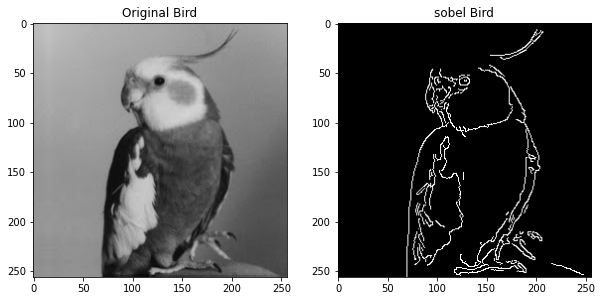

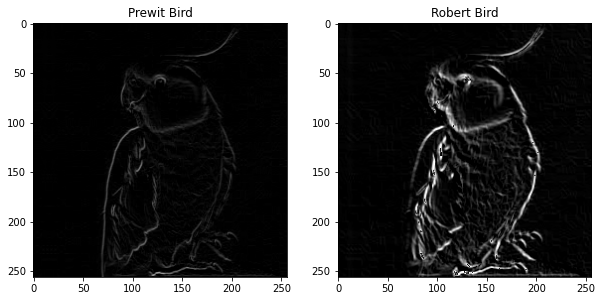

In [ ]:
f, ax = plt.subplots(1,2, figsize=(10,10))
ax[0].imshow(bird, cmap='gray')
ax[0].set_title("Original Bird")

ax[1].imshow(sbird, cmap='gray')
ax[1].set_title("sobel Bird")

f, ax = plt.subplots(1,2, figsize=(10,10))
ax[1].imshow(pbird, cmap='gray')
ax[0].set_title("Prewit Bird")

ax[0].imshow(rbird, cmap='gray')
ax[1].set_title("Robert Bird")

untuk citra bird, menurut saya yang paling bagus digunakan adalah metode robert karena hasilnya lebih terang dari prewit dan lebih mulus dari sobel

Text(0.5, 1.0, 'Robert lena')

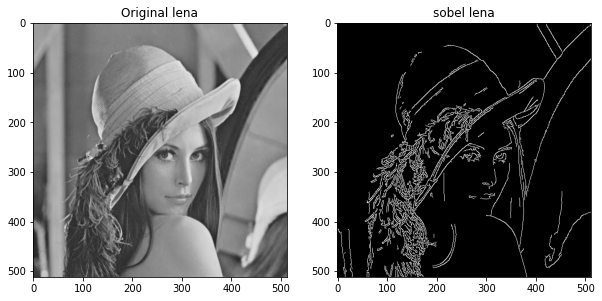

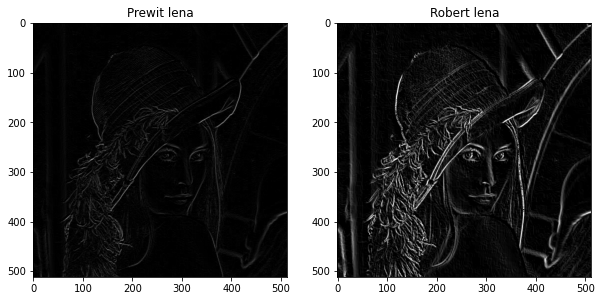

In [ ]:
f, ax = plt.subplots(1,2, figsize=(10,10))
ax[0].imshow(lena, cmap='gray')
ax[0].set_title("Original lena")

ax[1].imshow(slena, cmap='gray')
ax[1].set_title("sobel lena")

f, ax = plt.subplots(1,2, figsize=(10,10))
ax[1].imshow(plena, cmap='gray')
ax[0].set_title("Prewit lena")

ax[0].imshow(rlena, cmap='gray')
ax[1].set_title("Robert lena")

untuk citra lena, menurut saya lebih bagus menggunakan sobel karena hasil yand didapatkan lebih tajam daripada citra prewit dan robert

Text(0.5, 1.0, 'Roberts boat')

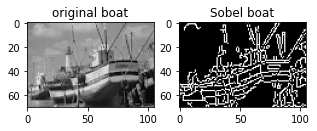

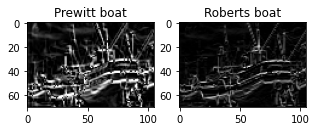

In [ ]:
f, ax = plt.subplots(1,2, figsize=(5,5))
ax[0].imshow(boat, cmap='gray')
ax[0].set_title("original boat")

ax[1].imshow(sboat, cmap='gray')
ax[1].set_title("Sobel boat")

f, ax = plt.subplots(1,2, figsize=(5,5))
ax[0].imshow(pboat, cmap='gray')
ax[0].set_title("Prewitt boat")

ax[1].imshow(rboat, cmap='gray')
ax[1].set_title("Roberts boat")

untuk citra boat, menurut saya metode yang bagus adalah prewit karena hasilnya lebih jelas dan lebih mulus daripada sobel dan robert

Text(0.5, 1.0, 'Roberts bwpepper')

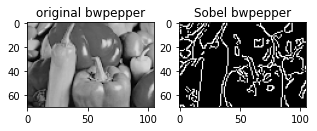

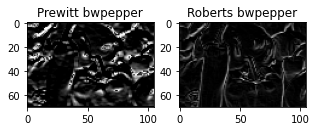

In [ ]:
f, ax = plt.subplots(1,2, figsize=(5,5))
ax[0].imshow(bwpepper, cmap='gray')
ax[0].set_title("original bwpepper")

ax[1].imshow(sbwpepper, cmap='gray')
ax[1].set_title("Sobel bwpepper")

f, ax = plt.subplots(1,2, figsize=(5,5))
ax[0].imshow(pbwpepper, cmap='gray')
ax[0].set_title("Prewitt bwpepper")

ax[1].imshow(rbwpepper, cmap='gray')
ax[1].set_title("Roberts bwpepper")

untuk citra black and white pepper ini, meotde yang bagus adalah sobel dan robert karena saya masih bisa mengidentifikasikan objek yang terdapat pada sobel dan robert daripada di citra prewitt

3. Lakukan deteksi tepi pada citra lena_noise dengan filter Canny.

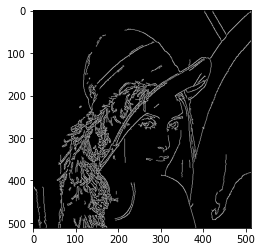

In [ ]:
clena = cv2.Canny(image=lena, threshold1=100, threshold2=200)
plt.imshow(clena, cmap = 'gray')

4. Lakukan deteksi tepi pada citra lena_noise dengan terlebih dahulu melakukan median filter dilanjutkan dengan filter Canny.

Text(0.5, 1.0, 'median filter lena')

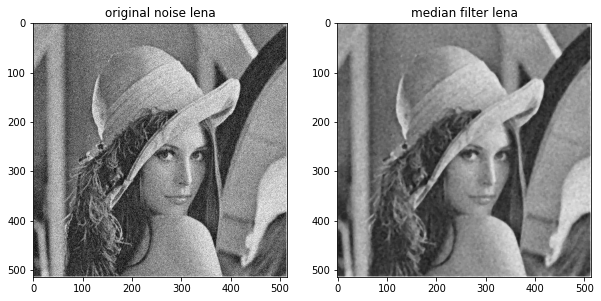

In [ ]:
lenan = cv2.imread('/content/drive/MyDrive/WORK/PERKULIAHAN/semester4/PDC/tugas2/lena_noise.jpg')

mlenan =  cv2.medianBlur(lenan,5)

f, ax = plt.subplots(1,2, figsize=(10,10))
ax[0].imshow(lenan, cmap='gray')
ax[0].set_title("original noise lena")

ax[1].imshow(mlenan, cmap='gray')
ax[1].set_title("median filter lena")

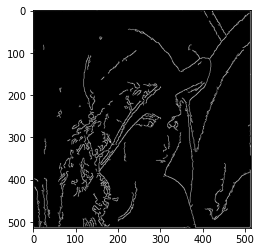

In [ ]:
clenan = cv2.Canny(image=mlenan, threshold1=100, threshold2=200)

plt.imshow(clenan, cmap = 'gray')